In [1]:
import os
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

from matplotlib import rcParams
sns.set(style="darkgrid")
sns.set_context("poster")


In [2]:
df=pd.read_csv("tic_2000_eval_data.csv")

In [3]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.253000,1.10600,2.675750,3.004000,5.787000,0.706750,4.653250,1.021250,3.269500,6.197000,...,0.084500,0.003500,0.010000,0.00375,0.579750,0.001500,0.003750,0.031000,0.009250,0.013250
std,13.022822,0.42108,0.767306,0.790025,2.899609,1.032241,1.729093,1.001274,1.618958,1.876585,...,0.394206,0.059065,0.099511,0.06113,0.560106,0.038706,0.072369,0.206276,0.095743,0.114358
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.00000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.00000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.00000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.00000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,5.000000,1.000000,1.000000,1.00000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [4]:
df.keys()

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

In [5]:
df.rename(columns={'MOSTYPE': 'Customer Subtype L0', 'MAANTHUI':'Number of houses 1 ñ 10', 'MGEMOMV' : 'Avg size household 1 ñ 6',
                   'MGEMLEEF':'Avg age see L1', 'MOSHOOFD': 'Customer main type see L2', 'MGODRK': 'Roman catholic see L3',
                   'MGODPR': 'Protestant','MGODOV' : 'Other religion', 'MGODGE': 'No religion','MRELGE' :'Married',
                   'MRELSA' : 'Living together','MRELOV' : 'Other relation','MFALLEEN' : 'Singles','MFGEKIND' : 'Household without children',
                   'MFWEKIND' : 'Household with children','MOPLHOOG' : 'High level education','MOPLMIDD' : 'Medium level education',
                   'MOPLLAAG' : 'Lower level education','MBERHOOG' : 'High status','MBERZELF' : 'Entrepreneur','MBERBOER' : 'Farmer',
                   'MBERMIDD' : 'Middle management','MBERARBG' : 'Skilled labourers','MBERARBO' : 'Unskilled labourers',
                   'MSKA' : 'Social class A','MSKB1' : 'Social class B1','MSKB2' : 'Social class B2','MSKC' : 'Social class C',
                   'MSKD' : 'Social class D','MHHUUR' : 'Rented house','MHKOOP' : 'Home owners','MAUT1' : '1 car','MAUT2' : '2 cars',
                   'MAUT0' : 'No car','MZFONDS' : 'National Health Service','MZPART' : 'Private health insurance','MINKM30' : 'Income < 30.000',
                   'MINK3045' : 'Income 30-45.000','MINK4575' : 'Income 45-75.000','MINK7512' : 'Income 75-122.000','MINK123M' : 'Income >123.000',
                   'MINKGEM' : 'Average income','MKOOPKLA' : 'Purchasing power class','PWAPART' : 'Contribution private third party insurance see L4','PWABEDR' : 'Contribution third party insurance (firms)',
                   'PWALAND' : 'Contribution third party insurance (agriculture)','PPERSAUT' : 'Contribution car policies','PBESAUT' : 'Contribution delivery van policies',
                   'PMOTSCO' : 'Contribution motorcycle/scooter policies','PVRAAUT' : 'Contribution lorry policies','PAANHANG' : 'Contribution trailer policies',
                   'PTRACTOR' : 'Contribution tractor policies','PWERKT' : 'Contribution agricultural machines policies','PBROM' : 'Contribution moped policies',
                   'PLEVEN' : 'Contribution life insurances','PPERSONG' : 'Contribution private accident insurance policies',
                   'PGEZONG' : 'Contribution family accidents insurance policies','PWAOREG' : 'Contribution disability insurance policies','PBRAND' : 'Contribution fire policies',
                   'PZEILPL' : 'Contribution surfboard policies','PPLEZIER' : 'Contribution boat policies','PFIETS' : 'Contribution bicycle policies',
                   'PINBOED' : 'Contribution property insurance policies','PBYSTAND' : 'Contribution social security insurance policies','AWAPART' : 'Number of private third party insurance 1 - 12',
                   'AWABEDR' : 'Number of third party insurance (firms)','AWALAND' : 'Number of third party insurance (agriculture)','APERSAUT' : 'Number of car policies',
                   'ABESAUT' : 'Number of delivery van policies','AMOTSCO' : 'Number of motorcycle/scooter policies', 'AVRAAUT' : 'Number of lorry policies','AAANHANG': 'Number of trailer policies',
                   'ATRACTOR' : 'Number of tractor policies','AWERKT' : 'Number of agricultural machines policies','ABROM' : 'Number of moped policies',
                   'ALEVEN' : 'Number of life insurances', 'APERSONG' : 'Number of private accident insurance policies','AGEZONG' : 'Number of family accidents insurance policies',
                   'AWAOREG' : 'Number of disability insurance policies','ABRAND' :'Number of fire policies','AZEILPL' :'Number of surfboard policies','APLEZIER' :'Number of boat policies',
                   'AFIETS' :'Number of bicycle policies','AINBOED' :'Number of property insurance policies','ABYSTAND' :'Number of social security insurance policies','CARAVAN' :'Number of mobile home policies 0 - 1'},
          inplace=True)


In [6]:
df.head()

,Customer Subtype L0,Number of houses 1 ñ 10,Avg size household 1 ñ 6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant,Other religion,No religion,Married,...,Number of life insurances,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies
0,33,1,4,2,8,0,6,0,3,5,...,0,0,0,0,1,0,0,0,0,0
1,6,1,3,2,2,0,5,0,4,5,...,2,0,0,0,1,0,0,0,0,0
2,39,1,3,3,9,1,4,2,3,5,...,1,0,0,0,1,0,0,0,0,0
3,9,1,2,3,3,2,3,2,4,5,...,0,0,0,0,1,0,0,0,0,0
4,31,1,2,4,7,0,2,0,7,9,...,0,0,0,0,1,0,0,0,0,0


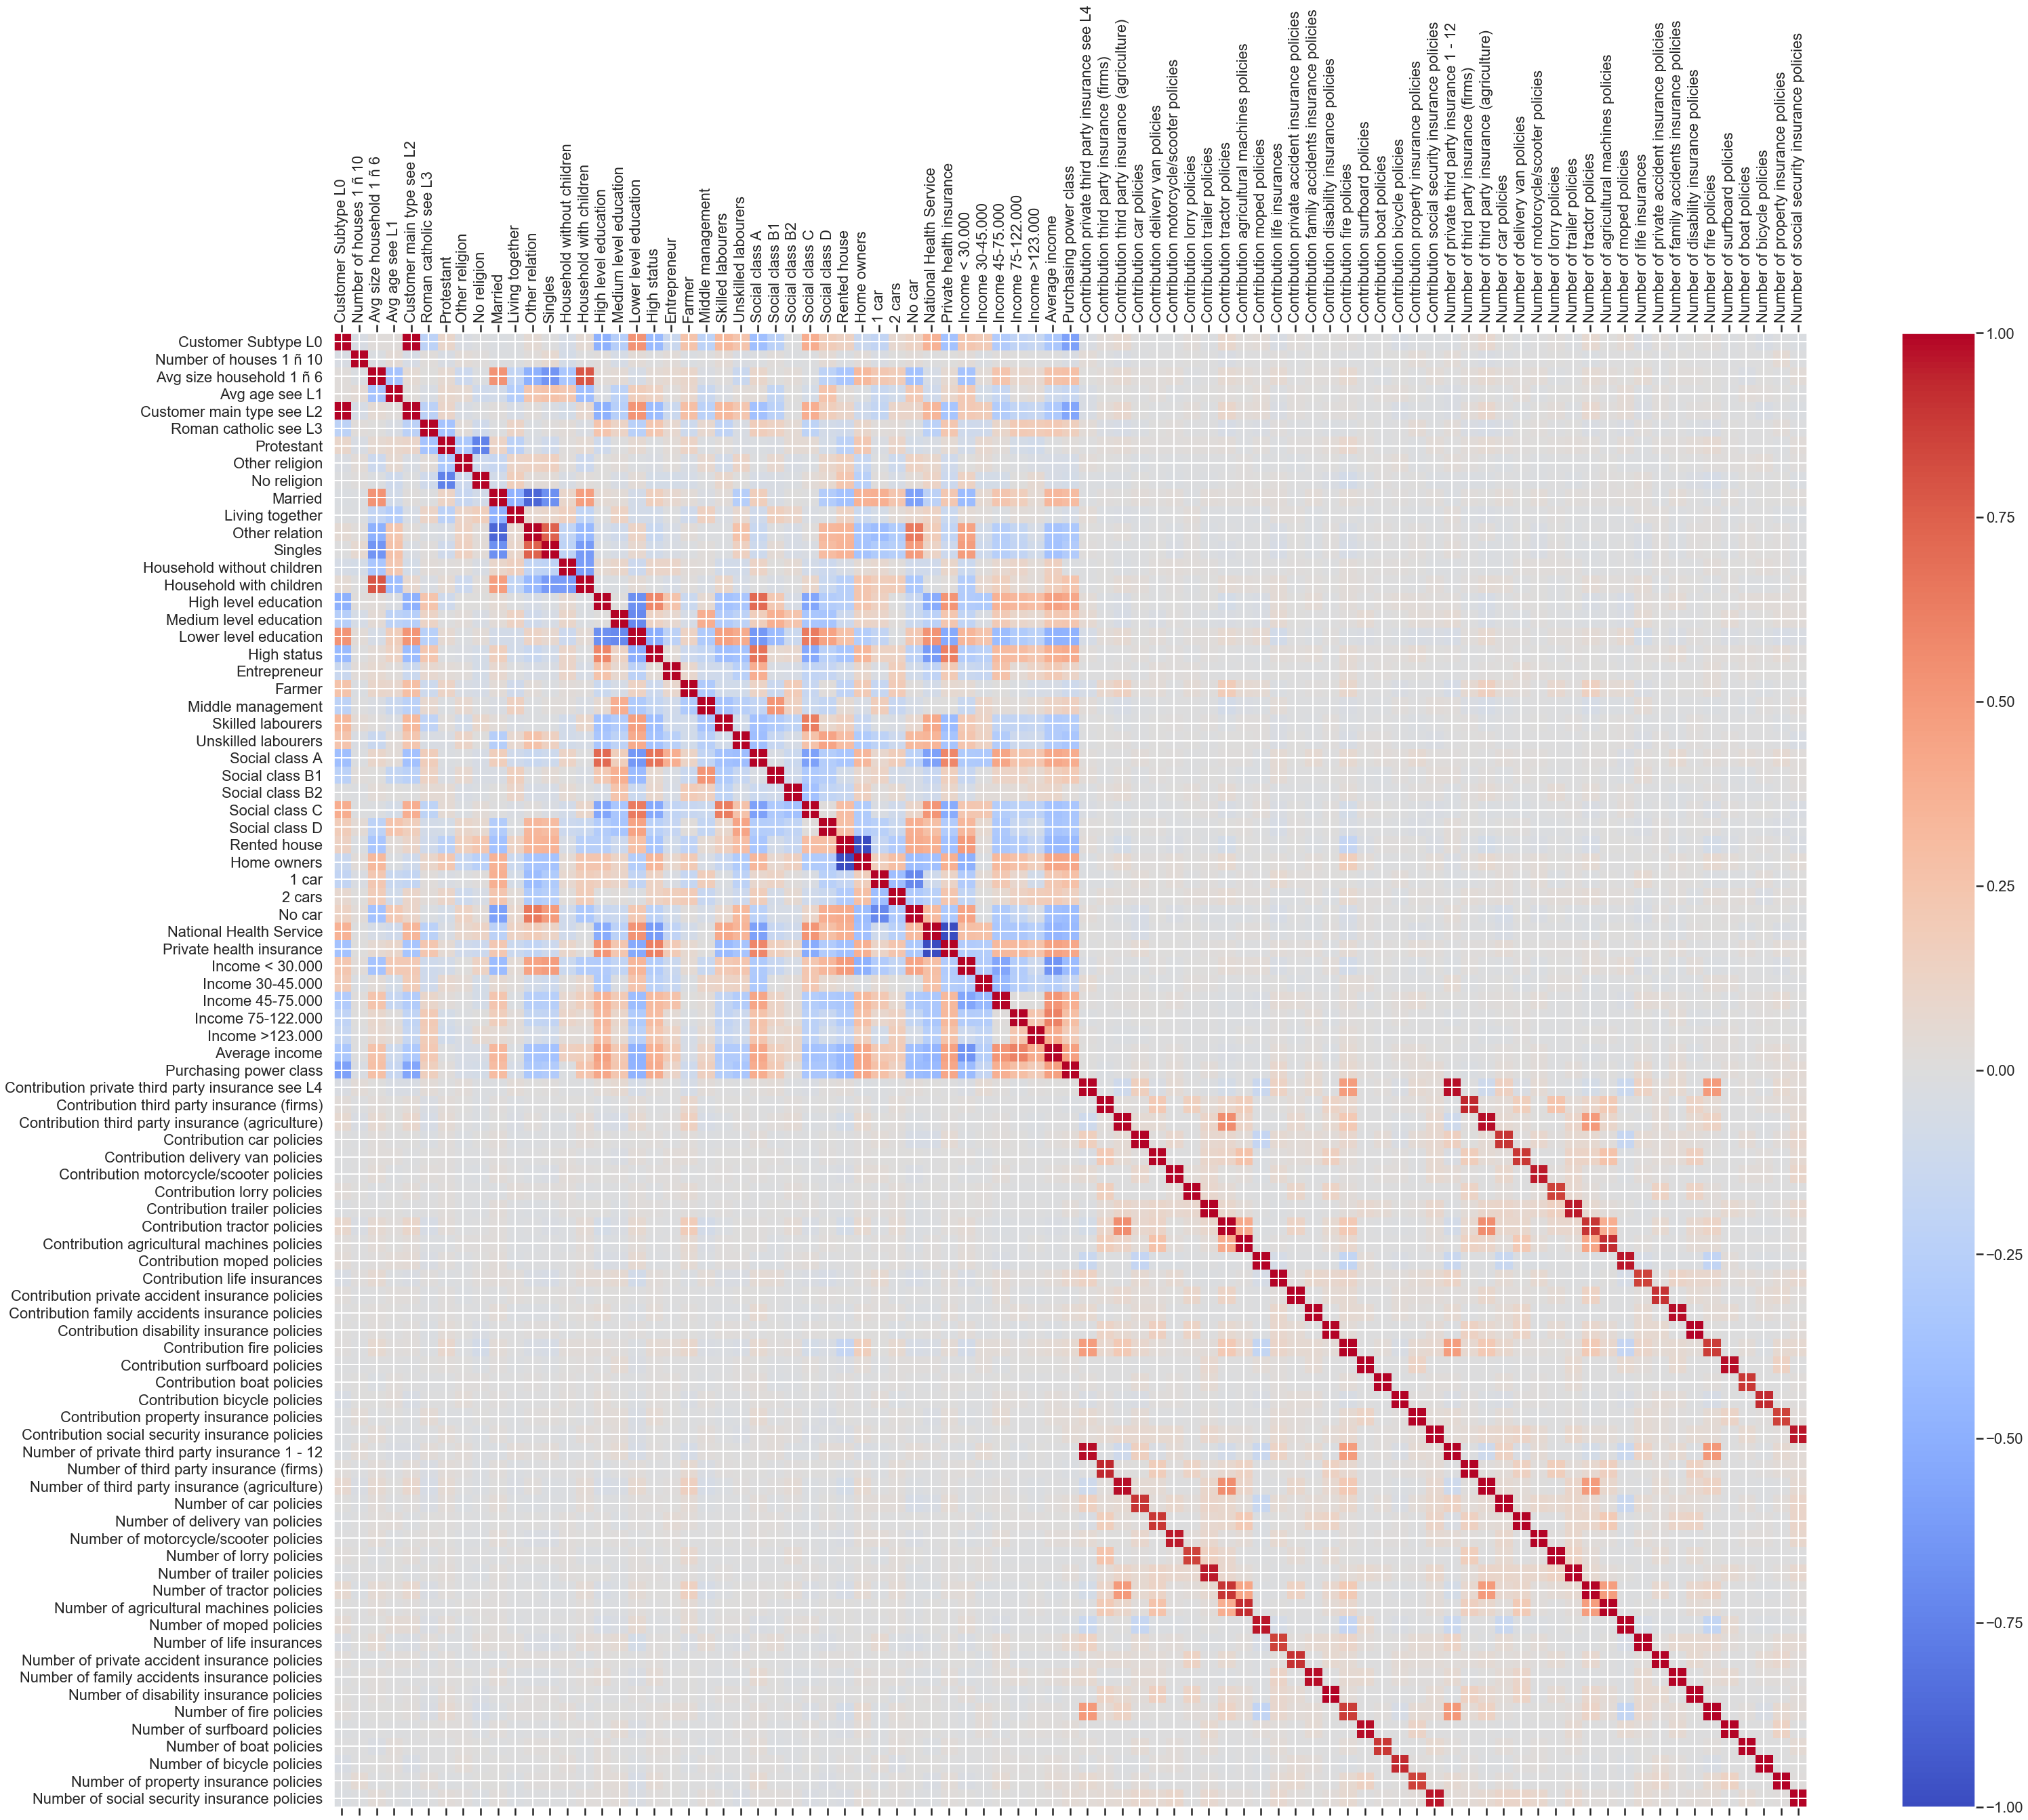

In [7]:
corr = df.corr()
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [8]:
#Find the top correlations in the chart above to better understand the dataset.
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
#first element of sol series is the pair with the bigest correlation

In [9]:
print(sol)

Rented house                                       Home owners                                          0.999728
National Health Service                            Private health insurance                             0.999578
Contribution disability insurance policies         Number of disability insurance policies              0.998462
Customer Subtype L0                                Customer main type see L2                            0.992775
Contribution private third party insurance see L4  Number of private third party insurance 1 - 12       0.980696
                                                                                                          ...   
Income >123.000                                    Contribution agricultural machines policies          0.000039
Other religion                                     Number of delivery van policies                      0.000038
Social class D                                     Number of car policies                       

In [10]:
#Drop highly correlated features to get better view of correlation.
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

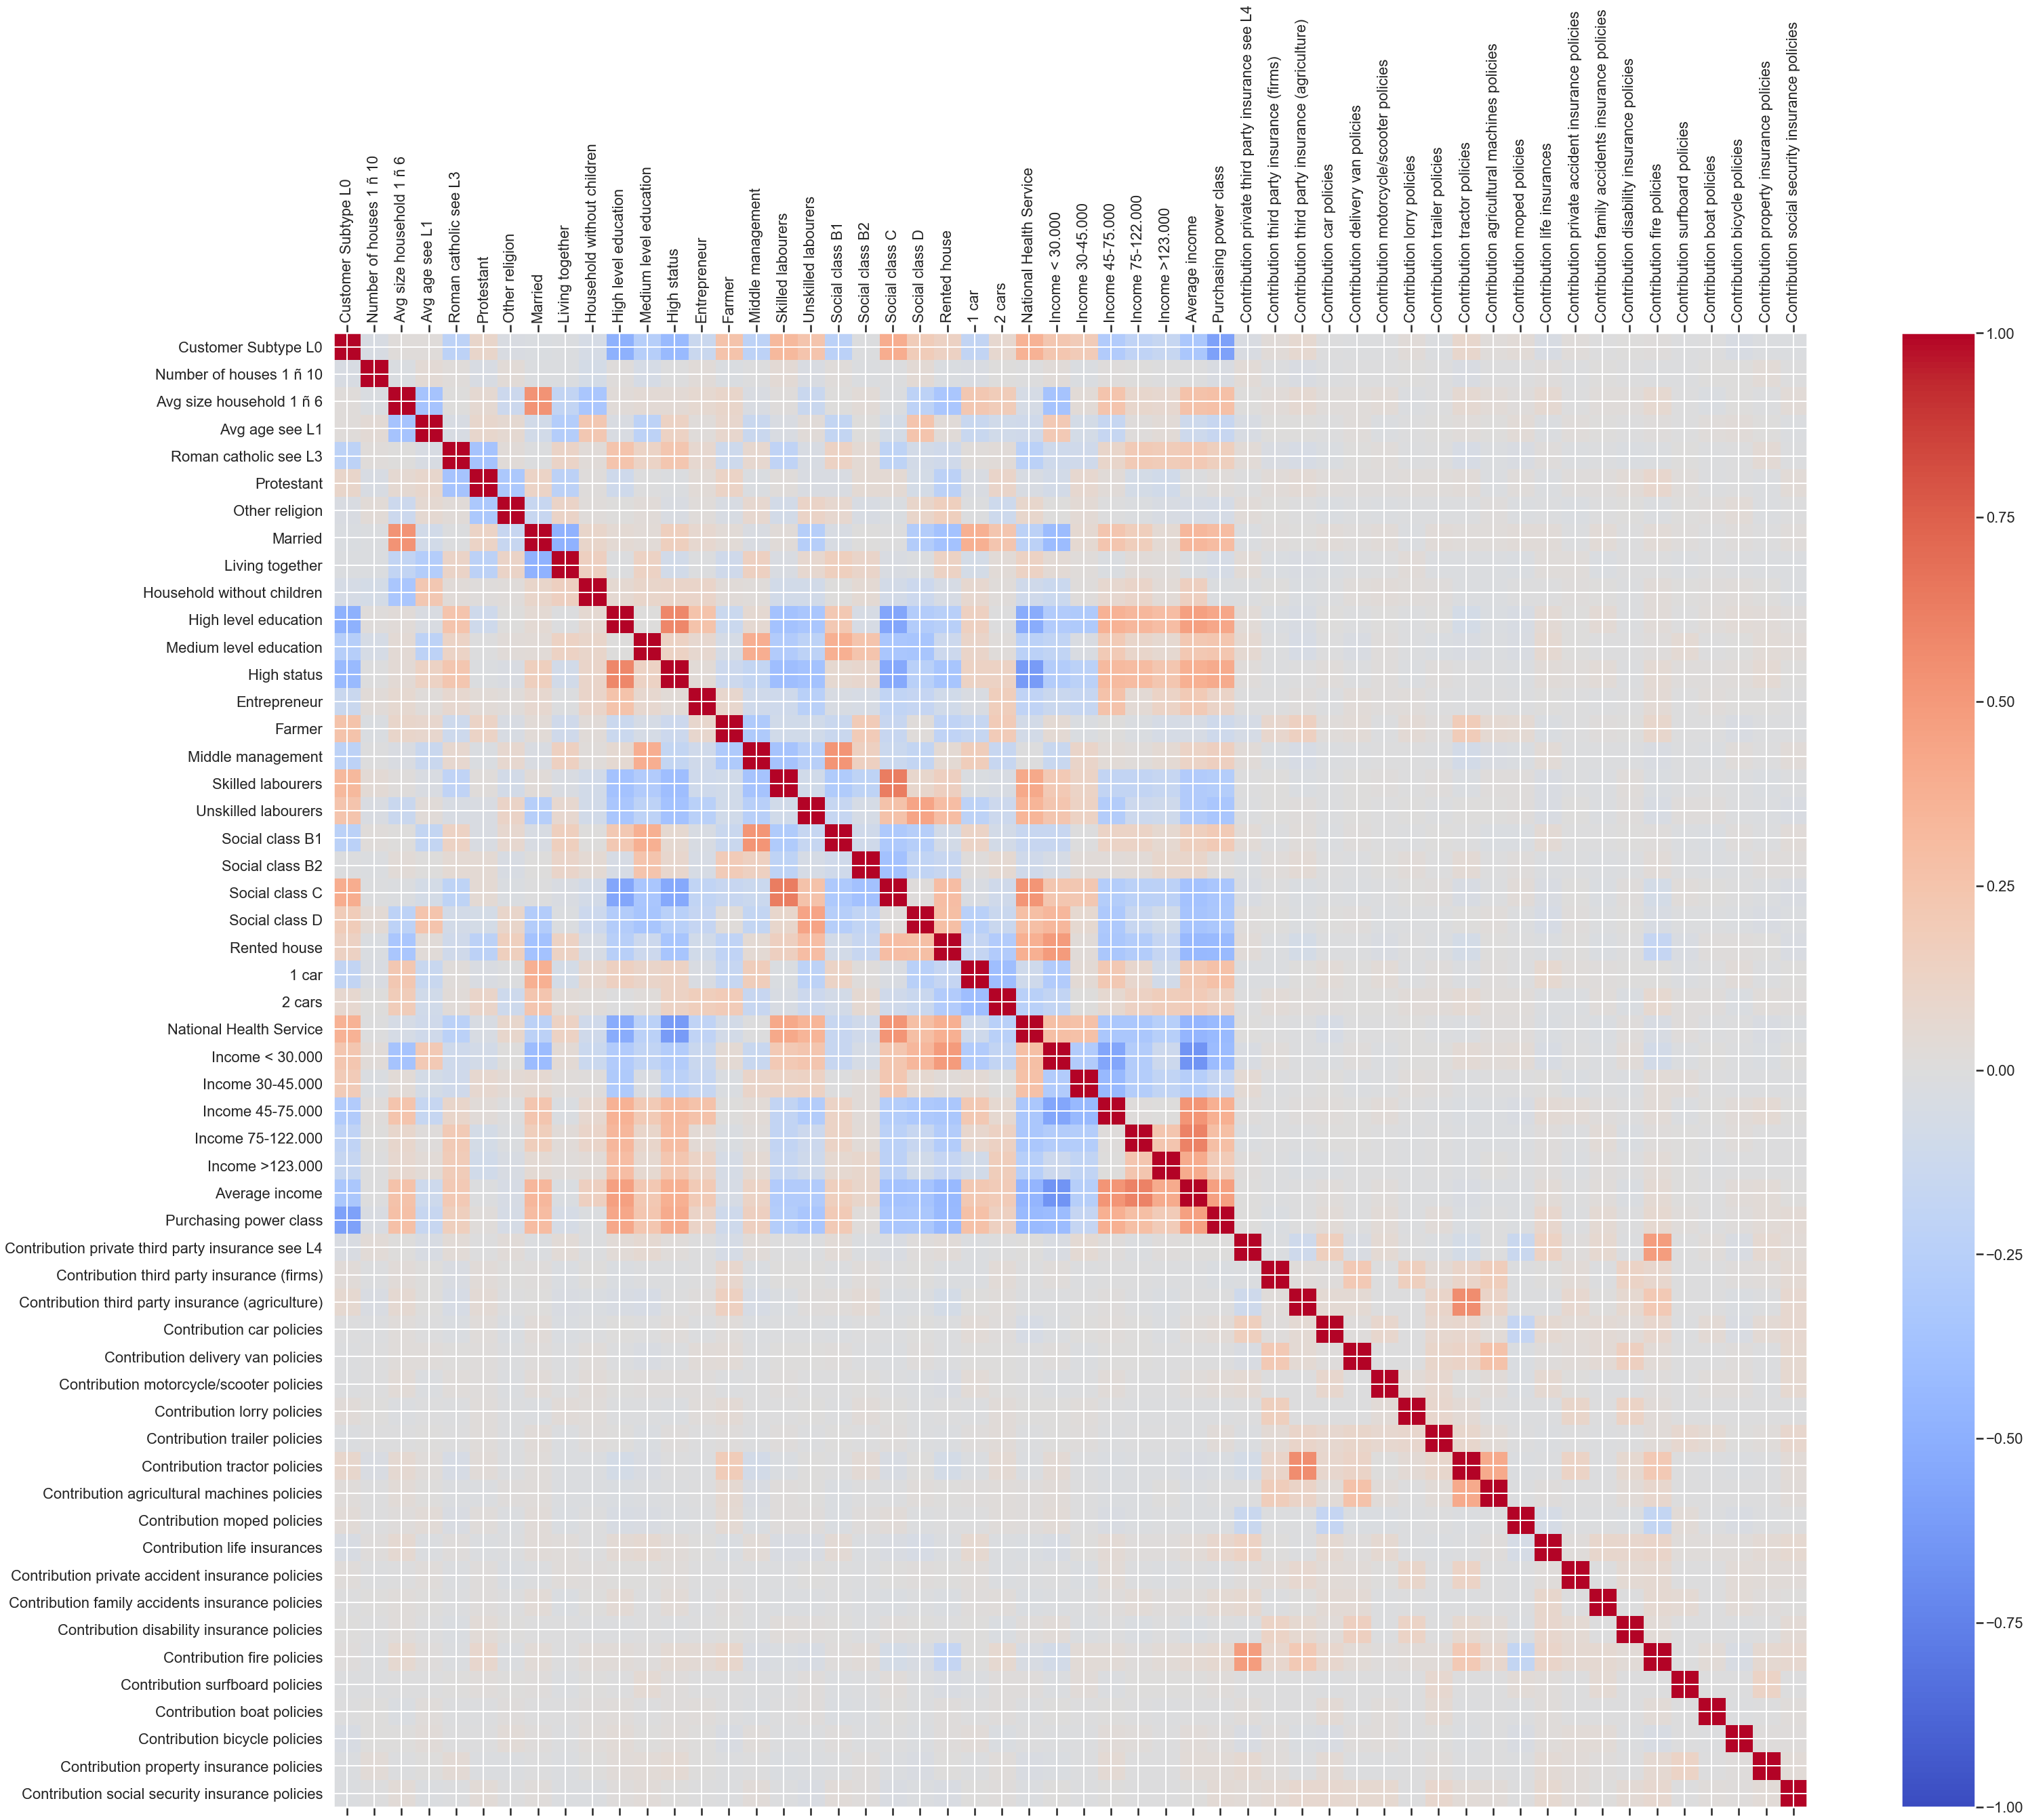

In [11]:
corr = df.corr()
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [12]:
#what is the % of outliers in each column
for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column Customer Subtype L0 outliers = 0.00%
Column Number of houses 1 ñ 10 outliers = 100.00%
Column Avg size household 1 ñ 6 outliers = 1.02%
Column Avg age see L1 outliers = 100.00%
Column Roman catholic see L3 outliers = 4.58%
Column Protestant outliers = 6.42%
Column Other religion outliers = 0.35%
Column Married outliers = 4.58%
Column Living together outliers = 4.40%
Column Household without children outliers = 2.38%
Column High level education outliers = 6.60%
Column Medium level education outliers = 3.08%
Column High status outliers = 1.18%
Column Entrepreneur outliers = 2.02%
Column Farmer outliers = 6.38%
Column Middle management outliers = 4.60%
Column Skilled labourers outliers = 5.22%
Column Unskilled labourers outliers = 3.70%
Column Social class B1 outliers = 6.45%
Column Social class B2 outliers = 2.20%
Column Social class C outliers = 0.00%
Column Social class D outliers = 2.08%
Column Rented house outliers = 0.00%
Column 1 car outliers = 1.52%
Column 2 cars outliers =

In [20]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [21]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.864 (0.042)
